In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heartDisease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Basic Analysis

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_columns = df.columns
df_columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


In [13]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Graphs

<AxesSubplot:xlabel='age', ylabel='Density'>

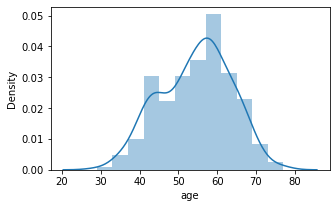

In [15]:
plt.figure(figsize=(5,3));
sns.distplot(df["age"])

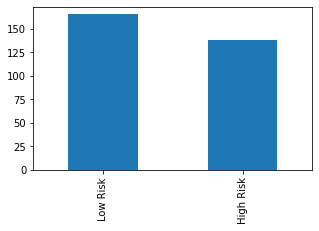

In [17]:
plt.figure(figsize=(5,3))
df["target"].value_counts().plot(kind = "bar");
plt.xticks([0,1],['Low Risk','High Risk']);

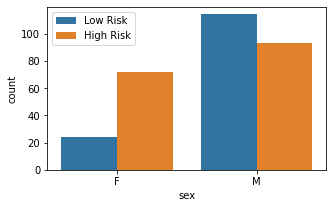

In [18]:
plt.figure(figsize=(5,3));
sns.countplot(data = df, x = "sex", hue = "target")
plt.xticks([0,1],['F','M']);
plt.legend(labels = ["Low Risk","High Risk"]);

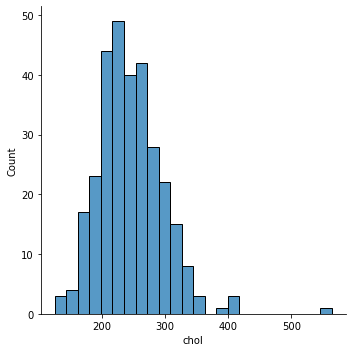

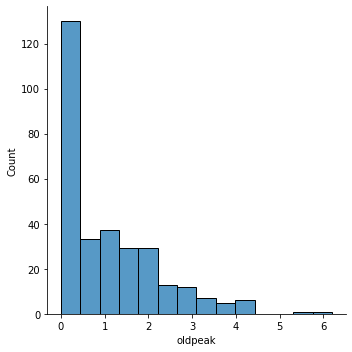

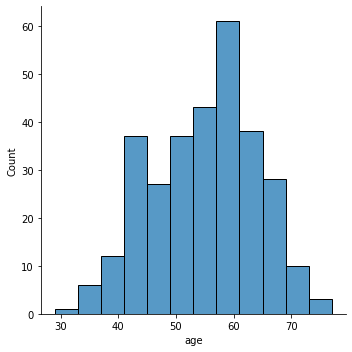

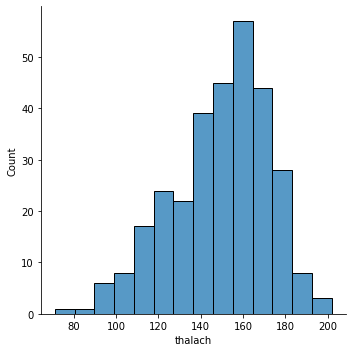

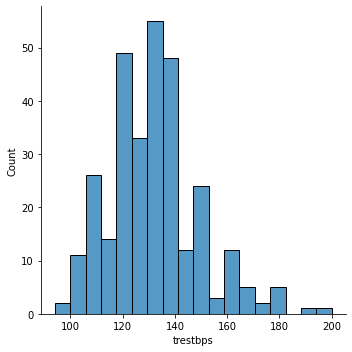

In [19]:
sns.displot(df['chol'], kde=False)
plt.show()
sns.displot(df['oldpeak'], kde=False)
plt.show()
sns.displot(df['age'], kde=False)
plt.show()
sns.displot(df['thalach'], kde=False)
plt.show()
sns.displot(df['trestbps'], kde=False)
plt.show()

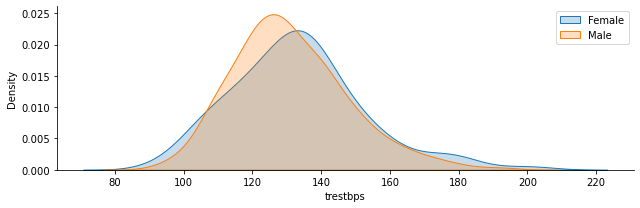

In [20]:
y = sns.FacetGrid(data=df,hue = "sex",aspect = 3)
y.map(sns.kdeplot,"trestbps",shade=True);
plt.legend(labels = ["Female","Male"] );

## Correlation

In [21]:
corr = df.corr()

<AxesSubplot:>

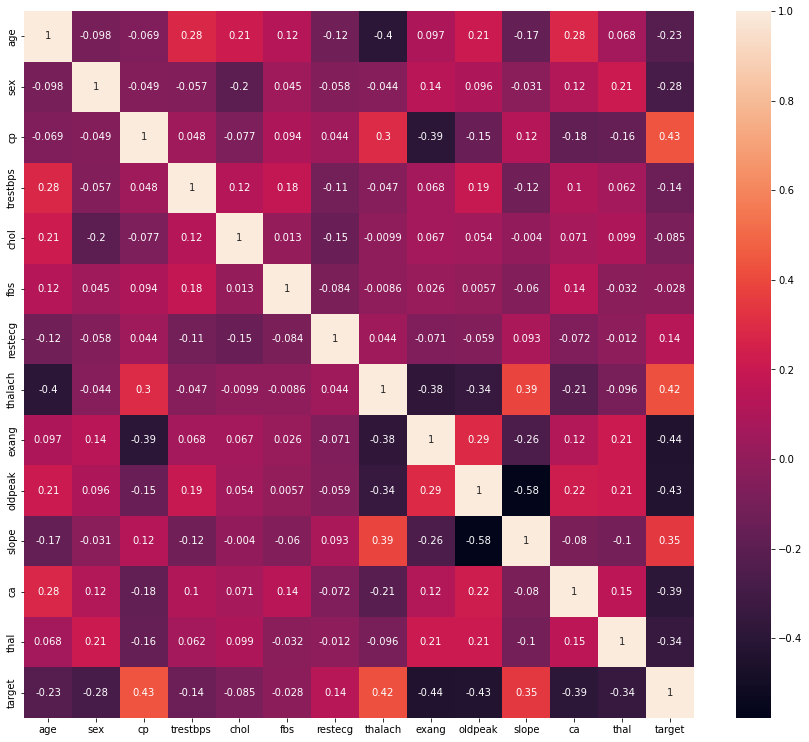

In [23]:
plt.figure(figsize=(15,13))
sns.heatmap(corr, annot = True)

## Removing Outliers

In [24]:
Counti_Col = ["age", "trestbps", "chol", "thalach","oldpeak"]

In [25]:
Catego_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [26]:
Catego_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [27]:
for i in Catego_col:
    print(i,df[i].unique())

sex [1 0]
cp [3 2 1 0]
fbs [1 0]
restecg [0 1 2]
exang [0 1]
slope [0 2 1]
ca [0 2 1 3 4]
thal [1 2 3 0]


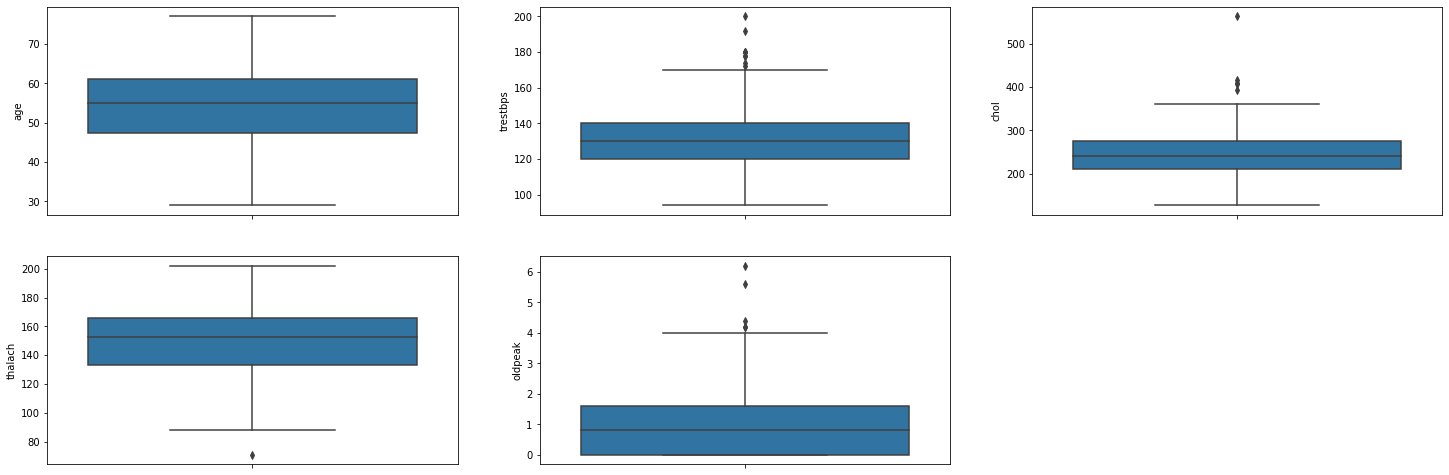

In [28]:
plt.figure(figsize=(25,13))
for j,i in enumerate(Counti_Col):
    plt.subplot(3,3,j+1)
    sns.boxplot(y = df[i], data = df)

In [30]:
k = df.trestbps.quantile([0.25,0.50,0.75])

In [31]:
k

0.25    120.0
0.50    130.0
0.75    140.0
Name: trestbps, dtype: float64

In [32]:
IQR = k[0.75] - k[0.25]
lower = k[0.25] - (1.5*IQR)
upper = k[0.75] + (1.5*IQR)

In [33]:
print("Total no of Outliers in trestbps", df[(df["trestbps"]<lower) | (df["trestbps"]>upper)].shape[0])
df_copy = df[(df["trestbps"]>lower) & (df["trestbps"]<upper)]

Total no of Outliers in trestbps 9


In [36]:
df.shape[0]

303

## Encoding

In [62]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [63]:
X = df.drop("target",axis=1)

In [64]:
X.shape

(303, 30)

In [65]:
Y = df.target

## Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
Scaling = StandardScaler()

In [67]:
#Data Spliting
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

## Model Building

In [69]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 150)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=150)

In [70]:
LR_pred = LR.predict(x_test)

In [71]:
from sklearn.metrics import classification_report, accuracy_score

In [72]:
LR_acc = accuracy_score(y_test,LR_pred)

In [73]:
print("Accuracy score of Logistic regression: {:.2f}%".format(LR_acc*100),end="\n\n")
print(classification_report(y_test, LR_pred))

Accuracy score of Logistic regression: 86.84%

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        37
           1       0.84      0.92      0.88        39

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [74]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion="gini",max_depth=150)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=150)

In [75]:
DTC_pred = DTC.predict(x_test)

In [76]:
DTC_acc = accuracy_score(y_test,DTC_pred)

In [77]:
print("Accuracy score of DecisionTreeClassifier: {:.2f}%".format(DTC_acc*100),end="\n\n")
print(classification_report(y_test, DTC_pred))

Accuracy score of DecisionTreeClassifier: 72.37%

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        37
           1       0.70      0.79      0.75        39

    accuracy                           0.72        76
   macro avg       0.73      0.72      0.72        76
weighted avg       0.73      0.72      0.72        76



In [78]:
#SUPPORT VECTOR MACHINE

from sklearn.svm import SVC
SVM = SVC(kernel = "linear",probability=True)
SVM.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [79]:
SVM_pred = SVM.predict(x_test)

In [80]:
SVM_acc = accuracy_score(y_test,SVM_pred)

In [81]:
print("Accuracy score of SupportVectorMachine: {:.2f}%".format(SVM_acc*100),end="\n\n")
print(classification_report(y_test, SVM_pred))

Accuracy score of SupportVectorMachine: 84.21%

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.81      0.90      0.85        39

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [82]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=150,random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [83]:
RFC_pred = RFC.predict(x_test)

In [84]:
RFC_acc = accuracy_score(y_test,RFC_pred)

In [85]:
print("Accuracy score of RandomForestClassifier: {:.2f}%".format(RFC_acc*100),end="\n\n")
print(classification_report(y_test, RFC_pred))

Accuracy score of RandomForestClassifier: 81.58%

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.82      0.82      0.82        39

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



In [87]:
#ADA BOOST

from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=4,learning_rate=1.0)
ABC.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=4)

In [88]:
ABC_pred = ABC.predict(x_test)

In [89]:
ABC_acc = accuracy_score(y_test,ABC_pred)

In [90]:
print("Accuracy score of AdaboostClassifier: {:.2f}%".format(ABC_acc*100),end="\n\n")
print(classification_report(y_test, ABC_pred))

Accuracy score of AdaboostClassifier: 84.21%

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.81      0.90      0.85        39

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



####  Therefore, after comparing the deployed models, Logistic Regression Tops the others with an accuracy of 86.84%  